## Summary

**Paper Presentation**: Automated Fact-Checking of Climate Change Claims with Large Language Models (23 Jan 2024) https://arxiv.org/abs/2401.12566

Slides https://github.com/yl1127/Academic-projects/blob/main/yl_Climate_LLM/yl_CLIMINATOR_final_0220.pdf

**Visualization Discussion**:
1. other split method(By default: Split by character ) https://python.langchain.com/docs/modules/data_connection/document_transformers/#evaluate-text-splitters
3. Create collection(By default: chroma) https://python.langchain.com/docs/modules/data_connection/vectorstores/
       https://python.langchain.com/docs/integrations/vectorstores
4. Visualization space https://umap-learn.readthedocs.io/en/latest/index.html

**Paper idea** : solve issues (hallucination, outdated information and prediction)
1. reply some exist data (RAG same as the chatclimate)
2. do the prediction (Agent let the LLM be able to use tool like our prediction model Autoregressive Distributed Lag (ARDL))
3. Answer the question like "Will coastal New York see the impact of Greenland ice sheet melting by 2100?"

(2.12)New mehtod: RAG details and visualize.

(2.6)Papers: 

ClimateBert: A Pretrained Language Model for Climate-Related Text (22 Oct 2021) https://arxiv.org/abs/2110.12010

Retrieval-Augmented Generation for Knowledge-Intensive NLP Tasks (22 May 2020) https://arxiv.org/abs/2005.11401

Query Expansion by Prompting Large Language Models (5 May 2023) https://arxiv.org/abs/2305.03653

PLLaMa: An Open-source Large Language Model for Plant Science (3 Jan 2024) https://arxiv.org/abs/2401.01600

GenCast: Diffusion-based ensemble forecasting for medium-range weather (25 Dec 2023) https://arxiv.org/abs/2312.15796


Google docs:

Q1.5: "Have emissions reductions fallen for some countries?"

Q2.2: "Is it possible the Arctic will become ice free at some points before 2050?"

https://docs.google.com/document/d/1HGypipUiT0u045w-9PcUgCWJAXOX4fqpFQNKhjiG6ys/edit?usp=sharing

All question: https://docs.google.com/document/d/1AEu75SflCQhwFmI4dBdG58RIPq7hzhkN6ip9h19dv0o/edit?usp=sharing



(1.31)New model: [Bard(Original)](https://bard.google.com/chat) For 13 questions from paper, [13 answers](https://g.co/bard/share/117570e457af) For 7 new questions, [7 answers](https://g.co/bard/share/644ebd6a4f50) API [Join Waitlist](https://cloud.google.com/ai/earlyaccess/join?hl=en)

(1.22) View the all [answers](yl_Appendix.ipynb).

(1.16) 7 questions:

1. What is the best estimate of the equilibrium climate sensitivity?
2. Is it possible the Arctic will become ice free at some points before 2050?
3. How likely will the world see runaway ice loss from the Antarctic  ice sheets by 2100?
4. To what extent has climate change impacted ice sheets in both polar regions?
5. Will coastal New York see the impact of Greenland ice sheet melting by 2100?
6. What will be the likely changes to weather and climate extremes in coastal New York around 2050 if the world take no action to reduce greenhouse gas emissions?
7. What are the primary evidence and how robust is it that human activities caused the observed global warming since the pre-industrial period?

The 13 original questions are from [chatClimate: Grounding Conversational AI in Climate Science](https://arxiv.org/abs/2304.05510)



The Climate report is from [IPCC_AR6_WGIII_FullReport](https://sdgs.un.org/sites/default/files/2023-01/IPCC_AR6_WGIII_FullReport.pdf)

(1.2)The Llama2(Original), ChatGPT-4(Original), Llama2+(Climate report) and Llama2 hybird code parts are available [here](https://github.com/yl1127/Academic-projects/blob/main/yl_Climate_LLM/yl_Climate_0102.ipynb).


(2023.12.18)The Llama2(Original) and Llama2+(Climate report) code parts are available [here](https://github.com/yl1127/Academic-projects/blob/main/yl_Climate_LLM/yl_LlamaCloud_Climate.ipynb).


## This demo app shows:
* How to run Llama2 in the cloud hosted on Replicate
* How to run ChatGPT in the cloud hosted on OpenAI
* How to use LangChain to ask LLMs general questions and follow up questions
* How to use LangChain to load a recent PDF doc - This is the well known RAG (Retrieval Augmented Generation) method to let LLM such as Llama2 be able to answer questions about the data not publicly available when Llama2 was trained, or about your own data. RAG is one way to prevent LLM's hallucination
* How to visualize the Embedding space
* How to use LangChain to load a directory which includes multiple PDF docs.
* You should also review the [HelloLlamaLocal](HelloLlamaLocal.ipynb) notebook for more information on RAG

**Note** We will be using Replicate to run the examples here. You will need to first sign in with Replicate with your github account, then create a free API token [here](https://replicate.com/account/api-tokens) that you can use for a while. 
After the free trial ends, you will need to enter billing info to continue to use Llama2 hosted on Replicate.

Let's start by installing the necessary packages:
- sentence-transformers for text embeddings
- chromadb gives us database capabilities 
- langchain provides necessary RAG tools for this demo

And setting up the Replicate token.

### How to set up the helper function?

In [1]:
# !pip install langchain replicate sentence-transformers chromadb pypdf

In [1]:
# Apply and enter API for Llama2
from getpass import getpass
import os

REPLICATE_API_TOKEN = getpass()
os.environ["REPLICATE_API_TOKEN"] = REPLICATE_API_TOKEN


 ········


Next we call the ChatGPT model from OpenAI. In this example we will use the ChatGPT-3.5-turbo chat model. You can find more ChatGPT models by searching for them on the [OpenAI API keys](https://platform.openai.com/api-keys).


In [2]:
# OpenAI API
from getpass import getpass
import os
import openai
from openai import OpenAI

# from dotenv import load_dotenv, find_dotenv
# _ = load_dotenv(find_dotenv()) # read local .env file
new_api_key = getpass()

os.environ["OPENAI_API_KEY"] = new_api_key
openai.api_key = os.environ['OPENAI_API_KEY']

openai_client = OpenAI()

 ········


In [3]:
# !pip install OpenAI
# !pip install typing-extensions --upgrade

In [26]:
from langchain.llms import Replicate
from IPython.display import display, Markdown

llama2_13b = "meta/llama-2-13b-chat:f4e2de70d66816a838a89eeeb621910adffb0dd0baba3976c96980970978018d"
llama2_70b = "meta/llama-2-70b-chat:02e509c789964a7ea8736978a43525956ef40397be9033abf9fd2badfe68c9e3"
# llm = Replicate(
#     model=llama2_13b,
#     model_kwargs={'prompt': f"{string_dialogue} {question} Assistant: ", "temperature": 0.01, "top_p": 1, "max_new_tokens":5000},
#     # max_tokens = 2000,
#     # n_ctx=4000,
# )

In [27]:
import langchain
langchain.debug = False

def get_llm(question):
    input_prompt = {
    "system": {
        "content": "You are Q&A bot. A highly intelligent system that answers user questions"
    },
    "role": "user",
    "content": question
    }

    llm = Replicate(
        model=llama2_13b,
        # model = llama2_70b,
        model_kwargs={'prompts': f"{input_prompt}", "temperature": 0.01, "top_p": 1, "max_new_tokens":5000},
        # max_tokens = 2000,
        # n_ctx=4000,
    )
    return llm(question)

In [28]:
client = openai.OpenAI()

def get_completion_from_messages(messages, 
                                 model="gpt-3.5-turbo", 
                                 temperature=0, 
                                 max_tokens=500):
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature, # this is the degree of randomness of the model's output
        max_tokens=max_tokens, # the maximum number of tokens the model can ouptut 
    )
    return response.choices[0].message.content

With the model set up, you are now ready to ask some questions. Here is an example of the simplest way to ask the model some general questions.

### Prompt Example 

In [11]:
messages =  [{'role':'user', 'content':'write me a story about a happy dog'}]
response = get_completion_from_messages(messages, temperature =1)
print(response)

Once upon a time, in a little town nestled between rolling hills and lush forests, there lived a happy golden retriever named Buddy. Buddy was known throughout the town for his friendly nature, wagging tail, and infectious joy.

Every morning, Buddy would wake up with a big stretch and a yawn, ready to start his day with boundless energy and enthusiasm. He would chase butterflies in the meadow, play fetch with the children at the park, and greet everyone he met with a wag of his tail and a friendly lick.

But Buddy's favorite time of the day was when his owner, Mary, would come home from work. The moment she walked through the door, Buddy would race to her side, wagging his tail so hard that his whole body seemed to wag along with it. Mary would kneel down to give Buddy a hug and a scratch behind the ears, and Buddy would close his eyes in pure bliss.

Together, Mary and Buddy would go for long walks in the woods, run through fields of wildflowers, and splash in the cool creek on hot s

In [22]:
# length
messages =  [  
{'role':'system',
 'content':'All your responses must be \
one sentence long.'},    
{'role':'user',
 'content':'write me a story about a happy dog'},  
] 
response = get_completion_from_messages(messages, temperature =1)
print(response)

Once there was a joyful dog named Buddy who spent his days playing in the park and making friends with everyone he met.


In [16]:
# poem style
messages =  [  
{'role':'system',
 'content':'You are an assistant who responds in the style of poem.'},    
 {'role':'user',
 'content':'write me a story about a happy dog'},  
] 
response = get_completion_from_messages(messages, temperature =1)
print(response)

In a little town by the rolling hills,
There lived a dog with boundless thrills.
His name was Charlie, joyful and free,
Running around with glee.

With a wagging tail and a bark so bright,
He greeted each day with sheer delight.
In the meadows, he chased butterflies,
Under the sun-kissed skies.

Through the woods, he would bound,
A playful spirit, never unbound.
His heart full of love and loyalty,
Bringing joy to all he'd see.

No matter the weather, rain or shine,
Charlie's happiness was always in line.
His simple joy a lesson to all,
To find contentment, big or small.

As days turned to years, his spirit strong,
He lived his life with a happy song.
And in the hearts of those he knew,
Charlie's legacy forever grew.

So here's to Charlie, the happy dog,
Forever dancing through life's fog.
A reminder to cherish each day,
And let happiness lead the way.


In [21]:
# Combine
messages =  [  
{'role':'system',
 'content':'You are an assistant who responds in the style of poem. \
     All your responses must be one sentence long.'},    
 {'role':'user',
 'content':'write me a story about a happy dog'},  
] 
response = get_completion_from_messages(messages, temperature =1)
print(response)

Once was a dog named Sunny, who wagged her tail bright and funny.


### How to load an external PDF and do embedding?

In [7]:
# !pip install pypdf

In [29]:
# from langchain.document_loaders import PyPDFLoader
from pypdf import PdfReader
loader = PdfReader("IPCC_AR6_WGIII_FullReport.pdf")
# docs = loader.load()
pdf_texts = [p.extract_text().strip() for p in loader.pages]
pdf_texts = [text for text in pdf_texts if text]
print(pdf_texts[0])

Working Group III contribution to the
Sixth Assessment Report of the 
Intergovernmental Panel on Climate ChangeWGIIIMitigation of Climate ChangeClimate Change 2022


In [30]:
# check docs length and content
# print(len(docs), docs[0].page_content[0:300])
# print(docs[100])
print(len(pdf_texts))
print(pdf_texts[1])

2030
Front cover photograph: Matt Bridgestock, Director and Architect at John Gilbert Architects
All International Energy Agency (IEA) Data, IEA Further Data and Derived Data has been  
sourced from https://www.iea.org/data-and-statistics.
© 2022 Intergovernmental Panel on Climate Change.
Electronic copies of this Summary for Policymakers are available from the IPCC website www.ipcc.ch
ISBN 978-92-9169-160-9


We need to store our documents. There are more than 30 vector stores (DBs) supported by LangChain. 
For this example we will use [Chroma](https://python.langchain.com/docs/integrations/vectorstores/chroma) which is light-weight and in memory so it's easy to get started with.
For other vector stores especially if you need to store a large amount of data - see https://python.langchain.com/docs/integrations/vectorstores

We will also import the HuggingFaceEmbeddings and RecursiveCharacterTextSplitter to assist in storing the documents.

In [31]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, SentenceTransformersTokenTextSplitter


In [32]:
character_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "\n", ". ", " ", ""],
    chunk_size=1000,
    chunk_overlap=20
)
character_split_texts = character_splitter.split_text('\n\n'.join(pdf_texts))

print(character_split_texts[10])
print(f"\nTotal chunks: {len(character_split_texts)}")

approaches falling outside the scope of individual sectors. 
As in the AR5, there is a chapter on recent trends and drivers, with 
the scope expanded to cover historic emissions and recent policy 
developments. Following the pattern established in the WG III AR5 
report, and the Special Report on Global Warming of 1.5°C, this 
report assesses published emission scenarios with a 21st century 
perspective. Modelled emission scenarios are categorised according 
to climate outcomes, allowing a handshake with the WG I assessment. 
To meet the goal of linking top-down and bottom-up insights, the 
report includes an additional pathways chapter that provides a mid-
century perspective, focussing on national and regional scales and the 
alignment between development pathways and mitigation actions.
As in the AR5, this report addresses mitigation enablers such as 
international cooperation, finance and investment, and policies and

Total chunks: 13302


To store the documents, we will need to split them into chunks using [`RecursiveCharacterTextSplitter`](https://python.langchain.com/docs/modules/data_connection/document_transformers/text_splitters/recursive_text_splitter) and create vector representations of these chunks using Embedding on them before storing them into our vector database. 

In general, you should use larger chuck sizes for highly structured text such as code and smaller size for less structured text. You may need to experiment with different chunk sizes and overlap values to find out the best numbers.

In [33]:
import chromadb
from chromadb.utils.embedding_functions import SentenceTransformerEmbeddingFunction

embedding_function = SentenceTransformerEmbeddingFunction()
print(embedding_function([character_split_texts[10]]))

[[-0.0008131897775456309, 0.005816067568957806, 0.07490230351686478, 0.06837400794029236, 0.08766964823007584, -0.0012497920542955399, -0.0640428364276886, -0.041942812502384186, -0.07316127419471741, 0.01825740560889244, -0.08234508335590363, -0.05028411000967026, -0.03627554699778557, 0.057594843208789825, -0.026721015572547913, 0.020879218354821205, -0.11043477058410645, -0.0446099191904068, -0.06738457083702087, -0.09205488860607147, 0.025163700804114342, 0.053215134888887405, 0.034258224070072174, -0.010387456975877285, 0.018884461373090744, -0.05462275445461273, -0.025599760934710503, 0.023365968838334084, -0.06750442087650299, 0.08059892803430557, 0.0327172689139843, 0.08507392555475235, -0.0669960305094719, -0.016989467665553093, 0.02977531962096691, 0.0656718760728836, 0.03229948505759239, 0.01954924501478672, 0.03471197932958603, 0.004731947090476751, 0.034873683005571365, -0.08469009399414062, 0.0052584330551326275, -0.05337139219045639, -0.03895178809762001, 0.0231067351996

In [34]:
print(len(character_split_texts[10]))

934


In [35]:
chroma_client = chromadb.Client()
chroma_collection = chroma_client.create_collection("IPCC_AR6_WGIII_FullReport.pdf", embedding_function=embedding_function)

ids = [str(i) for i in range(len(character_split_texts))]

chroma_collection.add(ids=ids, documents=character_split_texts)
chroma_collection.count()

13302

In [36]:
# question = "Is it still possible to limit warming to 1.5°C?" #Q1
claim = "More than 75 percent of the rainforest is losing resilience; More than half of the rainforest could be converted into savanna in a matter of decades."
query = "More than 75 percent of the rainforest is losing resilience; More than half of the rainforest could be converted into savanna in a matter of decades."

results = chroma_collection.query(query_texts=[query], n_results=5)
retrieved_documents = results['documents'][0]

for document in retrieved_documents:
    print(document)
    print('\n')

2°C.  Nat. Clim. Change, 8(11), 931–933, doi:10.1038/s41558-018-0321-8.Mori, A.S., K.P . Lertzman, and L. Gustafsson, 2017: Biodiversity and ecosystem 
services in forest ecosystems: a research agenda for applied forest ecology. 
J. Appl. Ecol., 54(1), 12–27, doi:10.1111/1365-2664.12669.
Moss, R. et al., 2016: Understanding dynamics and resilience in complex 
interdependent systems. Washington, DC, USA. https://www.globalchange.
gov/browse/reports/understanding-dynamics-and-resilience-complex-
interdependent-systems (Accessed July 23, 2021).
Mugambiwa, S.S. and H.M.  Tirivangasi, 2017: Climate change: A  threat 
towards achieving ‘sustainable development goal number two’ (end 
hunger, achieve food security and improved nutrition and promote 
sustainable agriculture) in South Africa. Jamba J. Disaster Risk Stud., 9(1), 
a350, doi:10.4102/jamba.v9i1.350.
Mulugetta, Y . and F . Urban, 2010: Deliberating on low carbon development.


468
Chapter 4 Mitigation and Development Pathways in the 

### How to visualize the Embedding space?

In [21]:
from helper_utils import word_wrap
from chromadb.utils.embedding_functions import SentenceTransformerEmbeddingFunction

embedding_function = SentenceTransformerEmbeddingFunction()

# chroma_collection = load_chroma(filename='microsoft_annual_report_2022.pdf', collection_name='microsoft_annual_report_2022', embedding_function=embedding_function)
chroma_collection.count()

13302

In [22]:
# !pip install umap
# !pip install umap-learn
# !pip install numpy scipy
# !pip install scikit-learn
# !pip install numba
# !pip install umap-learn
# !pip install tensorflow
# !pip install pynndescent
# !pip install umap-learn

In [23]:
import umap
# from umap import UMAP
# from umap import umap_ as UMAP
import numpy as np
from tqdm import tqdm

embeddings = chroma_collection.get(include=['embeddings'])['embeddings']
umap_transform = umap.UMAP(random_state=0, transform_seed=0).fit(embeddings)

/Users/ylpan/anaconda3/envs/llama-demo-apps/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [24]:
def project_embeddings(embeddings, umap_transform):
    umap_embeddings = np.empty((len(embeddings),2))
    for i, embedding in enumerate(tqdm(embeddings)): 
        umap_embeddings[i] = umap_transform.transform([embedding])
    return umap_embeddings   

In [25]:
projected_dataset_embeddings = project_embeddings(embeddings, umap_transform)

100%|████████████████████████████████████████████████████████████████████████████████████| 13302/13302 [1:09:27<00:00,  3.19it/s]


(2.514010286331177, 15.710518026351929, -3.671162819862366, 6.3194434404373165)

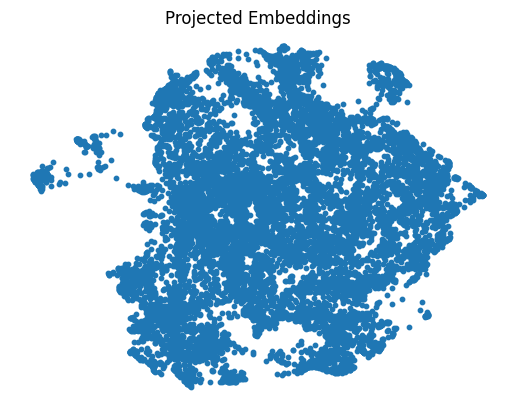

In [26]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10)
plt.gca().set_aspect('equal', 'datalim')
plt.title('Projected Embeddings')
plt.axis('off')

In [27]:
## Relevancy and Distraction

query = "Is it still possible to limit warming to 1.5°C?"

results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(document)
    print('')

agricultural markets and food security (Havlík et al. 2014; Hasegawa 
et al. 2018; Doelman et al. 2019; Fujimori et al. 2019). Mitigation 
policies aimed at achieving  1.5°C–2°C, if not managed properly, Box 3.6 (continued)
20
051015tCO2-eq yr–1
2030 2050
YearC1: limit warming 
to 1.5°C (>50%) 
with no or limited 
overshoot
C2: return 
warming to 1.5°C 
(>50%) after a 
high overshoot
C3: limit warming 
to 2°C (>67%)
C4: limit warming 
to 2°C (>50%)
C5: limit warming 
to 2.5°C (>50%)
C6: limit warming 
to 3°C (>50%)
C7: limit warming 
to 4°C (>50%)
C8: exceed 
warming of 4°C 
(≥50%)
Box 3.6, Figure 1 | Difference in per-capita emissions of Kyoto gases between the highest emitting and the lowest emitting of the 10 regions, 
in 2030 and 2050, by temperature category of pathways.
Through avoiding impacts of climate change, which fall more heavily on low-income countries, communities and households, and 
exacerbate poverty, mitigation reduces inequalities and poverty (Section 3.6.4.2).

of 

In [28]:
query_embedding = embedding_function([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.41it/s]


(2.514010286331177, 15.710518026351929, -3.671162819862366, 6.3194434404373165)

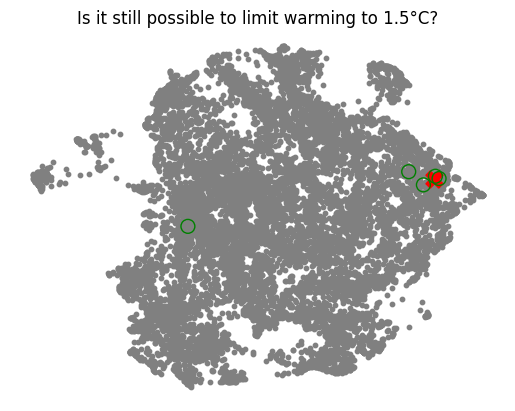

In [29]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')

### How to use LLM to enhance query?

Expansion with generated answers https://arxiv.org/abs/2305.03653

In [30]:
def augment_query_generated(query, model="gpt-3.5-turbo"):
    messages = [
        {
            "role": "system",
            "content": "You are a helpful research assistant. Provide an example answer to the given question, that might be found in a document like IPCC report. "
        },
        {"role": "user", "content": query}
    ] 

    response = openai_client.chat.completions.create(
        model=model,
        messages=messages,
    )
    content = response.choices[0].message.content
    return content

In [31]:
original_query = "Is it still possible to limit warming to 1.5°C?"
hypothetical_answer = augment_query_generated(original_query)

joint_query = f"{original_query} {hypothetical_answer}"
print(joint_query)

Is it still possible to limit warming to 1.5°C? According to the IPCC Special Report on Global Warming of 1.5°C, limiting global warming to 1.5°C is still technically and economically feasible, but would require unprecedented changes in all aspects of society. This would entail drastic reductions in greenhouse gas emissions, transformation of energy systems, significant changes in land use, and adoption of new technologies on a global scale. Time is of the essence, as every fraction of a degree of warming matters in terms of impacts on ecosystems and human societies. Achieving this goal would necessitate urgent and ambitious actions from governments, industry, and individuals around the world.


In [32]:
results = chroma_collection.query(query_texts=joint_query, n_results=5, include=['documents', 'embeddings'])
retrieved_documents = results['documents'][0]

for doc in retrieved_documents:
    print(doc)
    print('')

Policy, 124, 95–101, doi:10.1016/j.enpol.2018.07.012.
Rogelj, J., D.  Shindell, K.  Jiang, S.  Fifita, P .  Forster, V.  Ginzburg, C.  Handa, 
H.  Kheshgi, S.  Kobayashi, E.  Kriegler, L.  Mundaca, R.  Séférian, and 
M.V. Vilariño, 2018: Mitigation pathways compatible with 1.5°C in the 
context of sustainable development. In: Global Warming of 1.5°C an 
IPCC special report on the impacts of global warming of 1.5°C above pre-
industrial levels and related global greenhouse gas emission pathways, 
in the context of strengthening the global response to the threat of 
climate change, sustainable development, and efforts to eradicate 
poverty [Masson-Delmotte, V., P .  Zhai, H.-O.  Pörtner, D.  Roberts, J.  Skea, 
P .R. Shukla, A. Pirani, W. Moufouma-Okia, C. Péan, R. Pidcock, S. Connors, 
J.B.R.  Matthews, Y .  Chen, X.  Zhou, M.I.  Gomis, E.  Lonnoy, T.  Maycock, 
M. Tignor, and T. Waterfield (eds.)], Cambridge University Press, Cambridge, 
UK and New York, NY , USA, pp. 93–174.

Madruga,

In [33]:
retrieved_embeddings = results['embeddings'][0]
original_query_embedding = embedding_function([original_query])
augmented_query_embedding = embedding_function([joint_query])

projected_original_query_embedding = project_embeddings(original_query_embedding, umap_transform)
projected_augmented_query_embedding = project_embeddings(augmented_query_embedding, umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.42it/s]


(2.514010286331177, 15.710518026351929, -3.671162819862366, 6.3194434404373165)

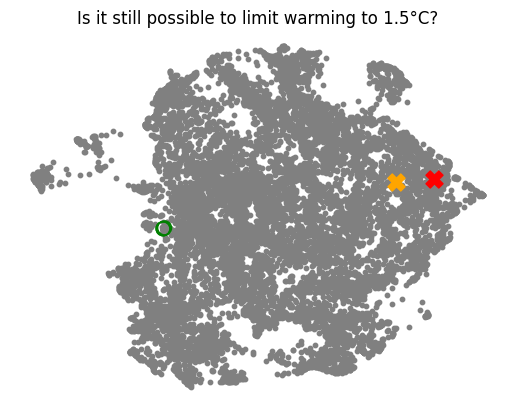

In [34]:
import matplotlib.pyplot as plt

# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')
plt.scatter(projected_original_query_embedding[:, 0], projected_original_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_augmented_query_embedding[:, 0], projected_augmented_query_embedding[:, 1], s=150, marker='X', color='orange')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{original_query}')
plt.axis('off')

### How to run ChatGPT + IPCC (Advocate)?

We then use `RetrievalQA` to retrieve the documents from the vector database and give the model more context on Llama 2, thereby increasing its knowledge.

For each question, LangChain performs a semantic similarity search of it in the vector db, then passes the search results as the context to Llama to answer the question.

In [49]:
# verdictsClimateFeedback = ['incorrect', 'inaccurate', 'imprecise', 'misleading','flawed_reasoing','lacks_context','unsupported','correct_but','mostly_correct','mostly_accurate','accurate', 'correct']
# verdictsClimateFeedback = ['incorrect', 'imprecise', 'misleading','flawed_reasoing','unsupported','mostly_correct', 'correct']
# verdictsClimateFeedback = ['incorrect', 'misleading','flawed_reasoing','unsupported', 'correct']
verdictsClimateFeedback = ['incorrect', 'correct']
content =  f"""
You are a Q&A bot , an intelligent system that acts as
a scientific fact - checker with vast knowledge of
climate change , climate science ,
environmental science , physics , and energy science .
You have been designed to answer users ’ questions
based on the information provided
above the question (the question is always in the last
line ) and your in - house knowledge .
You will be presented a claim , or a list of subclaims
that make up a whole claim .
Objective : Evaluate the accuracy of each of the user
statements solely based on the information
provided above each statement . In the end ,
aggregate the evaluation for each of the
subclaim to an overall statement about the veracity of
the claim .
Guidelines :
To ensure the most precise and comprehensive responses
, please follow the guidelines below :
1. Always base your verdict on the majority of the
information if conflicting evidence exists .
2. Do not rely solely on external sources or prior
knowledge . Use as much of the provided
information as possible to give a comprehensive
answer . If certain details are relevant , ensure
they are included in your response .
3. The user ’s question is ALWAYS in the final line .
When referencing the additional information above
the question , always cite the ’Reference ’, ’Page
’, and ’URL ’. These details can be found below
each piece of information .
4. If there is insufficient information to answer a
question , reply with ’I cannot answer your
question ’
5. It is important to maintain accuracy and avoid
creating information . If any aspect is unclear ,
seek clarification from the respective chatbots .
Assessment process
1. Evaluate evidence and agreement
2. Synthesize finding and assess confidence (
qualitative judgment )
3. Quantify uncertainty with a likelihood assessment
when necessary and where possible ( requires
sufficient confidence ; uncertainty is not always
quantifiable ).
4. In your assessment , make three levels of evidence
and agreement : a) high b) medium c) low
Instructions on extreme claims
While there may be sources or projections supporting
a given claim ,
it ’s essential to discern if it represents a
consensus or an outlier viewpoint .
Provide a comprehensive evaluation that weighs both
the factual basis of the claim
and the potential for it being presented in an
exaggerated or misleading manner . Of course ,
extremes
can happen , but it should be clear that these are
extreme scenarios .
Response Format :
1. If you have not enough information , state that you
cannot assess the claim and return "Not Enough
Information " and stop further analysis .
2. Offer a detailed explanation for your verdict ,
including references to the ’Reference ’, ’Page ’,
and ’URL ’ when citing the provided information .
3. Specify the level of certainty in your assessmen by
stating the level of evidence and agreement . low
evidence and low agreement correspond to very
low uncertainty ,
high evidence and high agreement .
4. If you have enough information , provide verdict
from the following options at the end of your
explanation . Strictly follow the format of
encapsulating your verdict in two parathesis and
only use the following options :""" + str(
verdictsClimateFeedback )

In [53]:
# use LangChain's RetrievalQA, to associate Llama with the loaded documents stored in the vector db
from langchain.chains import RetrievalQA
import langchain
langchain.debug = True

def get_chatclimate(query, retrieved_documents, model="gpt-3.5-turbo"):
    information = "\n\n".join(retrieved_documents)

    messages = [
        {
            "role": "system",
            "content": f"""
            You are a Q&A bot , an intelligent system that acts as
            a scientific fact - checker with vast knowledge of
            climate change , climate science ,
            environmental science , physics , and energy science .
            You have been designed to answer users ’ questions
            based on the information provided
            above the question (the question is always in the last
            line ) and your in - house knowledge .
            You will be presented a claim , or a list of subclaims
            that make up a whole claim .
            Objective : Evaluate the accuracy of each of the user
            statements solely based on the information
            provided above each statement . In the end ,
            aggregate the evaluation for each of the
            subclaim to an overall statement about the veracity of
            the claim .
            Guidelines :
            To ensure the most precise and comprehensive responses
            , please follow the guidelines below :
            1. Always base your verdict on the majority of the
            information if conflicting evidence exists .
            2. Do not rely solely on external sources or prior
            knowledge . Use as much of the provided
            information as possible to give a comprehensive
            answer . If certain details are relevant , ensure
            they are included in your response .
            3. The user ’s question is ALWAYS in the final line .
            When referencing the additional information above
            the question , always cite the ’Reference ’, ’Page
            ’, and ’URL ’. These details can be found below
            each piece of information .
            4. If there is insufficient information to answer a
            question , reply with ’I cannot answer your
            question ’
            5. It is important to maintain accuracy and avoid
            creating information . If any aspect is unclear ,
            seek clarification from the respective chatbots .
            Assessment process
            1. Evaluate evidence and agreement
            2. Synthesize finding and assess confidence (
            qualitative judgment )
            3. Quantify uncertainty with a likelihood assessment
            when necessary and where possible ( requires
            sufficient confidence ; uncertainty is not always
            quantifiable ).
            4. In your assessment , make three levels of evidence
            and agreement : a) high b) medium c) low
            Instructions on extreme claims
            While there may be sources or projections supporting
            a given claim ,
            it ’s essential to discern if it represents a
            consensus or an outlier viewpoint .
            Provide a comprehensive evaluation that weighs both
            the factual basis of the claim
            and the potential for it being presented in an
            exaggerated or misleading manner . Of course ,
            extremes
            can happen , but it should be clear that these are
            extreme scenarios .
            Response Format :
            1. If you have not enough information , state that you
            cannot assess the claim and return "Not Enough
            Information " and stop further analysis .
            2. Offer a detailed explanation for your verdict ,
            including references to the ’Reference ’, ’Page ’,
            and ’URL ’ when citing the provided information .
            3. Specify the level of certainty in your assessmen by
            stating the level of evidence and agreement . low
            evidence and low agreement correspond to very
            low uncertainty ,
            high evidence and high agreement .
            4. If you have enough information , provide verdict
            from the following options at the end of your
            explanation . Strictly follow the format of
            encapsulating your verdict in two parathesis and
            only use the following options :""" + str(verdictsClimateFeedback )
        },
        {"role": "user", "content": f"Information: {information}, \n Question: {query}."}
    ]
    
    response = openai_client.chat.completions.create(
        model=model,
        messages=messages,
    )
    content = response.choices[0].message.content
    return content


In [54]:
# question = "Is it still possible to limit warming to 1.5°C?" #Q1
query = "More than 75 percent of the rainforest is losing resilience; More than half of the rainforest could be converted into savanna in a matter of decades."

results = chroma_collection.query(query_texts=[query], n_results=5)
retrieved_documents = results['documents'][0]

# for document in retrieved_documents:
#     print(document)
#     print('\n')

output = get_chatclimate(query=query, retrieved_documents=retrieved_documents)

print(output)

Based on the provided information, particularly the details sourced from Mori et al. (2017), Turnhout et al. (2017), Turubanova et al. (2018), and other related sources, there is significant evidence to suggest that the Amazon rainforest is facing severe threats due to deforestation and policy changes in Brazil. The information from various studies highlights the increase in deforestation rates, the reduction in the power of environmental agencies, and the expansion of cropland into protected areas, leading to significant forest loss and degradation (Ferrante and Fearnside 2019; Rochedo et al. 2018; INPE 2020).

The data indicates that if current policies and trends continue, the Amazon may pass a tipping point beyond which remediation of lost ecosystems and restoration of carbon sinks could become unachievable (Lovejoy and Nobre 2018; INPE 2019a). These factors contribute to the overall vulnerability of the rainforest ecosystem.

Therefore, the claim that "More than 75 percent of the 

### How to run ChatGPT-3.5 hybrid chatClimate

In [ ]:
question = "Is it still possible to limit warming to 1.5°C?" #Q1

print(joint_query)

def get_hybrid(query, retrieved_documents, model="gpt-3.5-turbo"):
    information = "\n\n".join(retrieved_documents)

    messages = [
        {
            "role": "system",
            "content": "You are a Q&A bot, an intelligent system that answers user questions based on the information provided by the user above the question and your in-house knowledge. There are 5 pieces of extra information above the user question. please indicate the Page and Reference, which are provided below each piece of information. Additionally, let us know which part of your answer is from the IPCC information and which part is based on your in-house knowledge by writing either (IPCC AR6) or (Inhouse knowledge). If the information cannot be found in the information provided by the user or your in-house knowledge, please say ’I don’t know’."
        },
        {"role": "user", "content": f"Question: {query}. \n Information: {information}"}
    ]
    
    response = openai_client.chat.completions.create(
        model=model,
        messages=messages,
    )
    content = response.choices[0].message.content
    return content



In [ ]:
# question = "Is it still possible to limit warming to 1.5°C?" #Q1
query = "Is it still possible to limit warming to 1.5°C?" #Q1

# query = joint_query

results = chroma_collection.query(query_texts=[query], n_results=5)
retrieved_documents = results['documents'][0]

# for document in retrieved_documents:
#     print(document)
#     print('\n')

output = get_hybrid(query=query, retrieved_documents=retrieved_documents)

print(output)

### How does ChatGPT-4 answer?
[https://chat.openai.com/share/17cf5cc6-50db-4547-a56f-18756a974622](https://chat.openai.com/share/17cf5cc6-50db-4547-a56f-18756a974622)


In [ ]:
def get_ChatGPT(query, model="gpt-4"):
    # information = "\n\n".join(retrieved_documents)

    messages = [
        {
            "role": "system",
            "content": "You are Q&A bot. A highly intelligent system that answers user questions"
        },
        {"role": "user", "content": f"Question: {query}."}
    ]
    
    response = openai_client.chat.completions.create(
        model=model,
        messages=messages,
    )
    content = response.choices[0].message.content
    return content

In [ ]:
query = "Is it still possible to limit warming to 1.5°C?" #Q1
output = get_ChatGPT(query=query)

print(output)

### How to run ChatGPT-4+pdf(chatClimate)?

In [ ]:
question = "Is it still possible to limit warming to 1.5°C?" #Q1

# use LangChain's RetrievalQA, to associate Llama with the loaded documents stored in the vector db
from langchain.chains import RetrievalQA

def get_chatclimate(query, retrieved_documents, model="gpt-4"):
    information = "\n\n".join(retrieved_documents)

    messages = [
        {
            "role": "system",
            "content": "You are a Q&A bot, an intelligent system that answers user questions ONLY based on the information provided by the user. If you use user information, please indicate the Page and Reference, which are provided below each piece of information. If the information cannot be found in the information provided by the user, please say ’I don’t know’"
        },
        {"role": "user", "content": f"Question: {query}. \n Information: {information}"}
    ]
    
    response = openai_client.chat.completions.create(
        model=model,
        messages=messages,
    )
    content = response.choices[0].message.content
    return content
    

In [ ]:
# question = "Is it still possible to limit warming to 1.5°C?" #Q1
query = "Is it still possible to limit warming to 1.5°C?" #Q1

results = chroma_collection.query(query_texts=[query], n_results=5)
retrieved_documents = results['documents'][0]

# for document in retrieved_documents:
#     print(document)
#     print('\n')

output = get_chatclimate(query=query, retrieved_documents=retrieved_documents)

print(output)

### How to run ChatGPT-4 hybird chatClimate?

In [ ]:
question = "Is it still possible to limit warming to 1.5°C?" #Q1

from langchain.chains import RetrievalQA

def get_hybrid(query, retrieved_documents, model="gpt-4"):
    information = "\n\n".join(retrieved_documents)

    messages = [
        {
            "role": "system",
            "content": "You are a Q&A bot, an intelligent system that answers user questions based on the information provided by the user above the question and your in-house knowledge. There are 5 pieces of extra information above the user question. please indicate the Page and Reference, which are provided below each piece of information. Additionally, let us know which part of your answer is from the IPCC information and which part is based on your in-house knowledge by writing either (IPCC AR6) or (Inhouse knowledge). If the information cannot be found in the information provided by the user or your in-house knowledge, please say ’I don’t know’."
        },
        {"role": "user", "content": f"Question: {query}. \n Information: {information}"}
    ]
    
    response = openai_client.chat.completions.create(
        model=model,
        messages=messages,
    )
    content = response.choices[0].message.content
    return content



In [ ]:
# question = "Is it still possible to limit warming to 1.5°C?" #Q1
query = "Is it still possible to limit warming to 1.5°C?" #Q1

results = chroma_collection.query(query_texts=[query], n_results=5)
retrieved_documents = results['documents'][0]

# for document in retrieved_documents:
#     print(document)
#     print('\n')

output = get_hybrid(query=query, retrieved_documents=retrieved_documents)

print(output)

### How to load multiple PDFs?

We will use PyPDF Directory to load PDFs from directory.

In [ ]:
from langchain.document_loaders import PyPDFDirectoryLoader

loader = PyPDFDirectoryLoader("yl_External_PDFs/")
docs = loader.load()

In [ ]:
# check docs length and content
print(len(docs), docs[0].page_content[0:300])

To store the documents, we will need to split them into chunks using [`RecursiveCharacterTextSplitter`](https://python.langchain.com/docs/modules/data_connection/document_transformers/text_splitters/recursive_text_splitter) and create vector representations of these chunks using [`HuggingFaceEmbeddings`](https://www.google.com/search?q=langchain+hugging+face+embeddings&sca_esv=572890011&ei=ARUoZaH4LuumptQP48ah2Ac&oq=langchian+hugg&gs_lp=Egxnd3Mtd2l6LXNlcnAiDmxhbmdjaGlhbiBodWdnKgIIADIHEAAYgAQYCjIHEAAYgAQYCjIHEAAYgAQYCjIHEAAYgAQYCjIHEAAYgAQYCjIHEAAYgAQYCjIHEAAYgAQYCjIHEAAYgAQYCjIHEAAYgAQYCjIHEAAYgAQYCkjeHlC5Cli5D3ABeAGQAQCYAV6gAb4CqgEBNLgBAcgBAPgBAcICChAAGEcY1gQYsAPiAwQYACBBiAYBkAYI&sclient=gws-wiz-serp) on them before storing them into our vector database. 

In general, you should use larger chuck sizes for highly structured text such as code and smaller size for less structured text. You may need to experiment with different chunk sizes and overlap values to find out the best numbers.

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=20)
all_splits = text_splitter.split_documents(docs)

# create the vector db to store all the split chunks as embeddings
embeddings = HuggingFaceEmbeddings()
vectordb = Chroma.from_documents(
    documents=all_splits,
    embedding=embeddings,
) 
# slow 
# about 30 mins

We then use ` RetrievalQA` to retrieve the documents from the vector database and give the model more context on Llama 2, thereby increasing its knowledge.

For each question, LangChain performs a semantic similarity search of it in the vector db, then passes the search results as the context to Llama to answer the question.